# Welcome to the cerf quickstarter!

#### `cerf` is an open-source geospatial Python package for evaluating and analyzing future electricity technology capacity expansion feasibility. 


## Purpose

`cerf` was created to:

- Evaluate the feasibility of a future scenario-driven electricity technology capacity expansion plan as generated by a parent model,

- Site power plants in the least cost configuration when considering regional economics an on-the-ground barriers to siting,

- Assist planners and modelers of alternate future realizations of the electricity system to gain an understanding of how siting costs and service area congestion may respond under certain stressors.

## A brief introduction

The Capacity Expansion Regional Feasibility model (cerf) helps us evaluate the feasibility and structure of future electricity capacity expansion plans by siting power plants in areas that have been deemed the least cost option. We can use cerf to gain an understanding of topics such as: 1) whether or not future projected electricity expansion plans from models such as GCAM are possible to achieve, 2) where and which on-the-ground barriers to siting (e.g., protected areas, cooling water availability) may influence our ability to achieve certain expansions, and 3) how power plant infrastructure build outs and value may evolve into the future when considering locational marginal pricing (LMP) based on the supply and demand of electricity from a grid operations model.

Each grid cell in cerf is given an initial value of suitable (0) or unsuitable (1) based on a collection of suitability criteria gleaned from the literature. cerf’s default suitability layers include both those that are common to all thermal technologies as well as technology-specific suitability criteria. Common suitability layers represent categories such as protected lands, critical habitat areas, and much more. Technology-specific suitability layers are those that satisfy requirements that may not be applicable to all technologies. An example would be minimum mean annual flow requirements for cooling water availability for individual thermal technologies.

Though cerf provides sample data to run the conterminous United States (CONUS), it could be extended to function for any country or set of regions that had the following prerequisite data sources: a spatial representation of substations or electricity transmission infrastructure, a spatial representation of gas pipeline infrastructure if applicable, any regionally applicable spatial data to construct suitability rasters from, access to hourly zonal LMP, and access to technology-specific information and each technologies accompanying electricity capacity expansion plan per region. The Global Change Analysis Model (GCAM) is used to build our expansion plans and establish our technology-specific requirements through the end of the century. We derive our LMP from a grid operations model that also is harmonized with GCAM to provide consistent projections of energy system evolution. See more about how to generalize cerf for your research here.

We introduce a metric named Net Locational Cost (NLC) that is used compete power plant technologies for each grid cell based on the least cost option to site. NLC is calculated by subtracting the Net Operating Value (NOV) of a proposed power plant from the cost of its interconnection to the grid to represent the potential deployment value. Both the NOV parameter which incorporates many technology-specific values such as variable operations and maintenance costs, carbon price, heat rate, etc. and the interconnection cost parameter used for both electricity transmission and gas pipelines are configurable per time step. All equations used in cerf are described in detail in the [documentation](https://immm-sfa.github.io/cerf/user_guide.html#fundamental-equations-and-concepts).


## Load packages

In [1]:
import cerf


## Install package data

**NOTE**:  The package data will require approximately 195 MB of storage

In [2]:
cerf.install_package_data()


Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_gas_cc_ccs.sgrd
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/illustrative_lmp_8760-per-zone_dollars-per-mwh.zip
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_coal.sgrd
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_gas_cc.sgrd
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_gas_cc_ccs.sdat
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/config_2030.yml
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_coal.sdat
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_gas_cc.sdat
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/costs_gas_pipeline.yml
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_biomass_igcc_ccs.sgrd
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/eia_natural_gas_pipelines_conus_albers.zip
Unzipped: /Users/d3y010/repos/github/cerf/cerf/data/suitability_biomass_igcc_ccs.sdat
Unzipped: /Users/d3y010/rep

## Conduct a run with CERF

We will be exploring the main functionality of the `cerf` package using our example data which is meant for illustrative purposes only.  `cerf` runs using a single YAML configuration file that contains project and technology-specific settings, an electricity capacity expansion plan, and lmp zones pricing data which is described in detail in the docs [here](https://immm-sfa.github.io/cerf/).  Expansion plans and technology data are generally generated by models such as GCAM which capture multi-sector dynamics that represent alternate futures based on scenario assumptions for socioeconomics, radiative forcing, etc. The `cerf` package also comes equipped with power plant siting suitability data at a 1-km resolution over the CONUS, publically available data from EIA and HIFLD for transmission and pipeline infrastructure, and generic 8760 locational marginal pricing similar to what you could model using your prefered grid operations model.


### Get up and running right away!


#### 1. Run `cerf` to site power plants in an expansion plan for a single year for the CONUS

In [3]:
# sample year
yr = 2030

# load the sample configuration file path for the target year
config_file = cerf.config_file(yr)

# run the configuration for the target year and return a data frame
result_df = cerf.run(config_file, write_output=False)


2022-08-16 11:02:50,935 - root - INFO - Starting CERF model
2022-08-16 11:02:51,207 - root - INFO - Staging data...
2022-08-16 11:02:51,420 - root - INFO - Using 'zones_raster_file':  /Users/d3y010/.pyenv/versions/py3.9.4_cerf/lib/python3.9/site-packages/cerf-2.2.0-py3.9.egg/cerf/data/lmp_zones_1km.img
2022-08-16 11:02:51,454 - root - INFO - Processing locational marginal pricing (LMP)
2022-08-16 11:02:51,455 - root - INFO - Using LMP from default illustrative package data:  /Users/d3y010/.pyenv/versions/py3.9.4_cerf/lib/python3.9/site-packages/cerf-2.2.0-py3.9.egg/cerf/data/illustrative_lmp_8760-per-zone_dollars-per-mwh.zip
2022-08-16 11:03:01,429 - root - INFO - Calculating interconnection costs (IC)
2022-08-16 11:03:01,430 - root - INFO - Using default substation costs from file: /Users/d3y010/.pyenv/versions/py3.9.4_cerf/lib/python3.9/site-packages/cerf-2.2.0-py3.9.egg/cerf/data/costs_per_kv_substation.yml
2022-08-16 11:03:01,436 - root - INFO - Using default substation file: /User

##### `cerf` results are returned as a Pandas DataFrame

Each record is a sited power plant having a geographic location and other siting attributes. Reminder:  `cerf` uses the `USA_Contiguous_Albers_Equal_Area_Conic` projected coordinate reference system in its CONUS example data, so the `xcoord` and `ycoord` are relative to that projection.


In [4]:
result_df.head()

,region_name,tech_id,tech_name,unit_size_mw,xcoord,ycoord,index,buffer_in_km,sited_year,retirement_year,...,fuel_co2_content_tons_per_btu,fuel_price_usd_per_mmbtu,fuel_price_esc_rate_fraction,heat_rate_btu_per_kWh,lifetime_yrs,operational_life_yrs,variable_om_usd_per_mwh,variable_om_esc_rate_fraction,carbon_tax_usd_per_ton,carbon_tax_esc_rate_fraction
0,alabama,4,coal_conv_pul_wo_ccs,600.0,781947.1645,-443565.2005,9637916,5,2030,2090,...,0.36036,2.45646,0.00804,7861.8,60.0,60.0,3.873467,-0.00399,0.0,0.0
1,alabama,4,coal_conv_pul_wo_ccs,600.0,837947.1645,-683565.2005,10764292,5,2030,2090,...,0.36036,2.45646,0.00804,7861.8,60.0,60.0,3.873467,-0.00399,0.0,0.0
2,alabama,4,coal_conv_pul_wo_ccs,600.0,881947.1645,-594565.2005,10346659,5,2030,2090,...,0.36036,2.45646,0.00804,7861.8,60.0,60.0,3.873467,-0.00399,0.0,0.0
3,alabama,4,coal_conv_pul_wo_ccs,600.0,847947.1645,-674565.2005,10722065,5,2030,2090,...,0.36036,2.45646,0.00804,7861.8,60.0,60.0,3.873467,-0.00399,0.0,0.0
4,alabama,4,coal_conv_pul_wo_ccs,600.0,792947.1645,-462565.2005,9727094,5,2030,2090,...,0.36036,2.45646,0.00804,7861.8,60.0,60.0,3.873467,-0.00399,0.0,0.0


#### 2. Run `cerf` to site power plants in an expansion plan for multiple years for the CONUS

This exercise demonstrates how to inherit sites from a previous year's results and keep them in the mix if they have not yet reached retirement.  If this is done in `cerf`, users should ensure that their expansion plan is only for new vintage each timestep.


In [ ]:
import cerf

# process year 2010, 2030, and 2050
for index, yr in enumerate([2010, 2030, 2050]):

    print(f"\nProcessing year:  {yr}")

    # load the sample configuration file path for the target year
    config_file = cerf.config_file(yr)

    # do not intialize the run with previously sited data if it is the first time step
    if index == 0:
        result_df = cerf.run(config_file, write_output=False)

    else:
        result_df = cerf.run(config_file, write_output=False, initialize_site_data=result_df)


##### Explore the results that account for retirement

Since we inherited the each year, and we are only siting new vintage per year, we see power plants from multiple technlogies until they reach their retirement age.  We can narrow in on `biomass` power plants in Virginia to see this:


In [ ]:
result_df.loc[(result_df['region_name'] == 'virginia') & (result_df['tech_id'] == 9)]


##### Plot the output

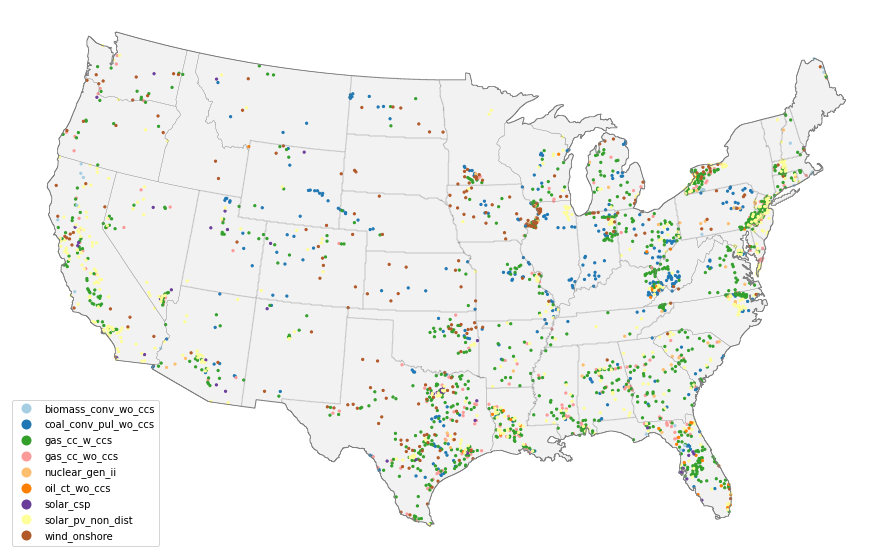

In [5]:
cerf.plot_siting(result_df)
